## SYDE 556/750: Simulating Neurobiological Systems

Accompanying Readings: Chapter 2

## NEF Principle 1 - Representation

- Activity of neurons change over time

<img src="files/lecture2/spikes.jpg" width="800">

- This probably means something
- Sometimes it seems pretty clear what it means

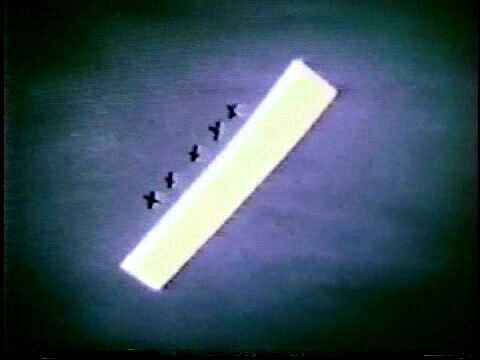

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('KE952yueVLA', width=720, height=400, loop=1, autoplay=0)

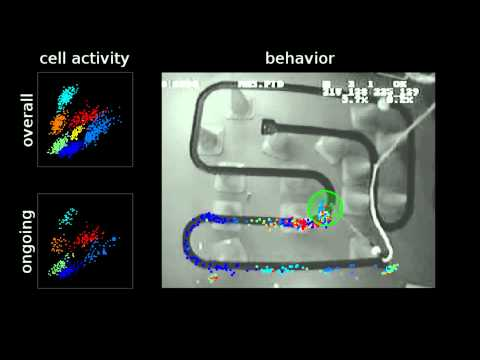

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('lfNVv0A8QvI', width=720, height=400, loop=1, autoplay=0) 

- Some sort of mapping between neural activity and a state in the world
    - my location
    - head tilt
    - image
    - remembered location
    
- Intuitively, we call this "representation"
    - In neuroscience, people talk about the 'neural code'
    - To formalize this notion, the NEF uses information theory (or coding theory)

- Critical obvious difference between this and ANNs:
    - Time is an intrinsic part of the representation
    - We start by ignoring this, but it is a theoretica debt we have to repay

## Representation formalism

- Value being represented:  $x$
- Neural activity:  $a$
- Neuron index: $i$

### Encoding and decoding

- Have to define both to define a code
- Lossless code (e.g. Morse Code):
    - encoding: $a = f(x)$
    - decodng: $x = f^{-1}(a)$
- Lossy code:
    - encoding: $a = f(x)$
    - decoding: $\hat{x} = g(a) \approx x$




## Distributed representation

- Not just one neuron per $x$ value (or per $x$)
    - Many different $a$ values for a single $x$
- Encoding: $a_i = f_i(x)$
- Decoding: $\hat{x} = g(a_0, a_1, a_2, a_3, ...)$


## Example: binary representation

Encoding (nonlinear):
$$
a_i = \begin{cases}
    1 &\mbox{if } x \mod {2^{i}} > 2^{i-1} \\ 
    0 &\mbox{otherwise} 
    \end{cases}
$$

Decoding (linear):
$$
\hat{x} = \sum_i a_i 2^{i-1}
$$

--------------------

Suppose: $x = 13$

Encoding: 
$a_1 = 1$, $a_2 = 0$, $a_3 = 1$, $a_4 = 1$

Decoding:
$\hat{x} = 1*1+0*2+1*4+1*8 = 13$
    

## Linear decoding

- Write decoder as $\hat{x} = \sum_ia_i d_i$

- Linear decoding is nice and simple
    - Works fine with non-linear encoding (!)
    
- The NEF uses linear decoding, but what about the encoding?

## Neuron encoding

$a_i = f_i(x)$ 

- What do we know about neurons?

<img src="files/lecture1/NeuronStructure.jpg">

- Firing rate goes up as total input current goes up
    - $a_i = G_i(J)$
    
- What is $G_i$?
    - depends on how detailed a neuron model we want.
    


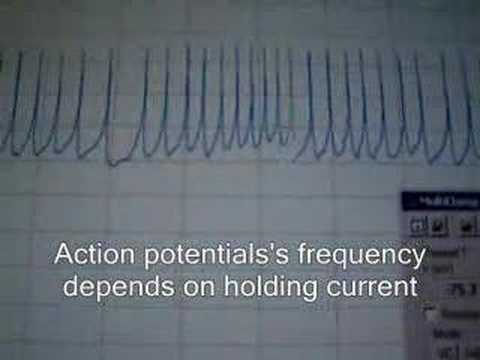

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('hxdPdKbqm_I', width=720, height=400, loop=1, autoplay=0) 

### Rectified Linear Neuron

Populating the interactive namespace from numpy and matplotlib


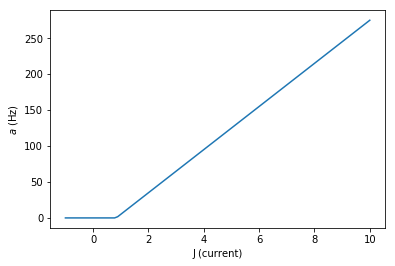

In [3]:
# Rectified linear neuron
%pylab inline
import numpy
import nengo

n = nengo.neurons.RectifiedLinear()

J = numpy.linspace(-1,10,100)

plot(J, n.rates(J, gain=30, bias=-25))
xlabel('J (current)')
ylabel('$a$ (Hz)');

### Leaky integrate-and-fire neuron

$ a = {1 \over {\tau_{ref}-\tau_{RC}ln(1-{1 \over J})}}$

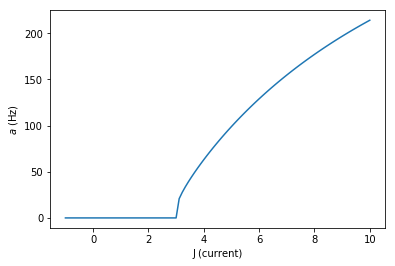

In [5]:
#assume %pylab inline has been run

# Leaky integrate and fire
import numpy
import nengo

n = nengo.neurons.LIFRate(tau_rc=0.02, tau_ref=0.002) #n is a Nengo LIF neuron, these are defaults

J = numpy.linspace(-1,10,100)

plot(J, n.rates(J, gain=1, bias=-2)) 
xlabel('J (current)')
ylabel('$a$ (Hz)'); 

### Response functions
- These are called "response functions"
    - How much neural firing changes with change in current
    - Similar for many classes of cells (e.g. pyramidal cells - most of cortex)
    - This is the $G_i$ function in the NEF: it can be pretty much anything

## Tuning Curves
- Neurons seem to be sensitive to particular values of $x$
    - How are neurons 'tuned' to a representation?  or...
    
- What's the mapping between $x$ and $a$?
    - Recall 'place cells', and 'edge detectors'

- Sometimes they are fairly straight forward:

<img src="files/lecture2/tuning_curve_auditory.gif">


- But not often:

<img src="files/lecture2/tuning_curve.jpg">


<img src="files/lecture2/orientation_tuning.png">

- Is there a general form?

### Tuning curves (cont.)
- The NEF suggests that there is...
    - Something generic and simple
    - That covers all the above cases (and more)
- Let's start with the simpler case:

<img src="files/lecture2/tuning_curve_auditory.gif">

- Note that the experimenters are graphing $a$, as a function of $x$
    - $x$ is much easier to measure than $J$
    - So, there are two mappings of interest:
        1. $x$->$J$
        2. $J$->$a$ (response function)
    - Together these give the tuning curve
    
- $x$ is the volume of the sound in this case

- Any ideas?

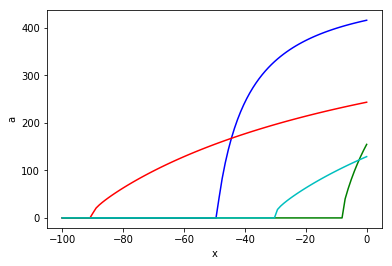

In [6]:
#assume this has been run
#%pylab inline 
import numpy
import nengo

n = nengo.neurons.LIFRate() #n is a Nengo LIF neuron

x = numpy.linspace(-100,0,100)

plot(x, n.rates(x, gain=1, bias=50), 'b') # x*1+50
plot(x, n.rates(x, gain=0.1, bias=10), 'r') # x*0.1+10
plot(x, n.rates(x, gain=0.5, bias=5), 'g') # x*0.05+5
plot(x, n.rates(x, gain=0.1, bias=4), 'c') #x*0.1+4))

xlabel('x')
ylabel('a');

For mapping #1, the NEF uses a linear map:
$ J = \alpha x + J^{bias} $


- But what about type (c) in this graph?

<img src="files/lecture2/tuning_curve.jpg">

- Easy enough:

$ J = - \alpha x + J^{bias} $



- But what about type(b)?  Or these ones?

<img src="files/lecture2/orientation_tuning.png">

- There's usually some $x$ which gives a maximum firing rate
    - ...and thus a maximum $J$
- Firing rate (and $J$) decrease as you get farther from the preferred $x$ value
    - So something like $J = \alpha [sim(x, x_{pref})] + J^{bias}$
- What sort of similarity measure?    
- Let's think about $x$ for a moment
    - $x$ can be anything... scalar, vector, etc.
    - Does thinking of it as a vector help?

# The Encoding Equation (i.e. Tuning Curves)

- Here is the general form we use for everything (it has both 'mappings' in it)
- $a_i = G_i[\alpha_i x \cdot e_i + J_i^{bias}] $
    - $\alpha$ is a gain term (constrained to always be positive)
    - $J^{bias}$ is a constant bias term
    - $e$ is the *encoder*, or the *preferred direction vector*
    - $G$ is the neuron model
    - $i$ indexes the neuron
- To simplify life, we always assume $e$ is of unit length
    - Otherwise we could combine $\alpha$ and $e$
- In the 1D case, $e$ is either +1 or -1
- In higher dimensions, what happens?

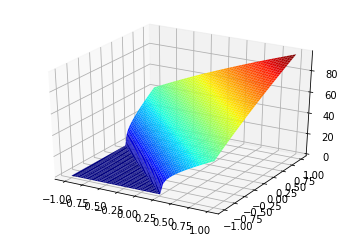

In [10]:
#assume this has been run
#%pylab inline 

import numpy
import nengo

n = nengo.neurons.LIFRate()

e = numpy.array([1.0, 1.0]) 
e = e/numpy.linalg.norm(e)

a = numpy.linspace(-1,1,50)
b = numpy.linspace(-1,1,50)

X,Y = numpy.meshgrid(a, b)

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, n.rates((X*e[0]+Y*e[1]), gain=1, bias=1.5), 
                    linewidth=0, cstride=1, rstride=1, cmap=pylab.cm.jet)

- But that's not how people normally plot it
- It might not make sense to sample *every possible* x
- Instead they might do some subset
    - For example, what if we just plot the points around the unit circle?

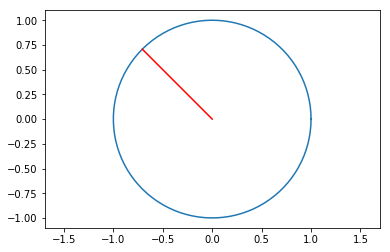

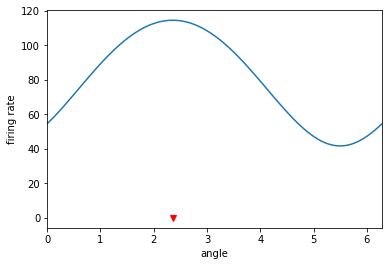

In [8]:
import nengo
import numpy

n = nengo.neurons.LIFRate()

theta = numpy.linspace(0, 2*numpy.pi, 100)
x = numpy.array([numpy.cos(theta), numpy.sin(theta)])
plot(x[0],x[1])
axis('equal')

e = numpy.array([-1.0, 1.0])
e = e/numpy.linalg.norm(e)

plot([0,e[0]], [0,e[1]],'r')

gain = 1
bias = 2.5

figure()
plot(theta, n.rates(numpy.dot(x.T, e), gain=gain, bias=bias))
plot([numpy.arctan2(e[1],e[0])],0,'rv')
xlabel('angle')
ylabel('firing rate')
xlim(0, 2*numpy.pi);

- That starts looking a lot more like the real data.

## Notation

- Encoding
    - $a_i = G_i[\alpha_i x \cdot e_i + J^{bias}_i]$
    
- Decoding
    - $\hat{x} = \sum_i a_i d_i$
    
- The textbook uses $\phi$ for $d$ and $\tilde \phi$ for $e$
    - We're switching to $d$ (for decoder) and $e$ (for encoder)

## Decoder

- But where do we get $d_i$ from?
    - $\hat{x}=\sum a_i d_i$
    
- Find the optimal $d_i$
    - How?
    - Math

## Solving for $d$

- Minimize the average error over all $x$, i.e.,

$ E = \frac{1}{2}\int_{-1}^1 (x-\hat{x})^2 \; dx $

- Substitute for $\hat{x}$:

$ 
\begin{align}
E = \frac{1}{2}\int_{-1}^1 \left(x-\sum_i^N a_i d_i \right)^2 \; dx 
\end{align}
$

- Take the derivative with respect to $d_i$:

$
\begin{align}
{{\partial E} \over {\partial d_i}} &= {1 \over 2} \int_{-1}^1 2 \left[ x-\sum_j a_j d_j \right] (-a_i) \; dx \\
{{\partial E} \over {\partial d_i}} &= - \int_{-1}^1 a_i x \; dx + \int_{-1}^1 \sum_j a_j d_j a_i \; dx 
\end{align}
$

- At the minimum (i.e. smallest error), $ {{\partial E} \over {\partial d_i}} = 0$

$
\begin{align}
\int_{-1}^1 a_i x \; dx &= \int_{-1}^1 \sum_j(a_j d_j a_i) \; dx \\
\int_{-1}^1 a_i x \; dx &= \sum_j \left(\int_{-1}^1 a_i a_j \; dx\right)d_j 
\end{align}
$

- That's a system of $N$ equations and $N$ unknowns
- In fact, we can rewrite this in matrix form
    
$ \Upsilon = \Gamma d $

where

$ 
\begin{align}
\Upsilon_i &= {1 \over 2} \int_{-1}^1 a_i x \;dx\\
\Gamma_{ij} &= {1 \over 2} \int_{-1}^1 a_i a_j \;dx 
\end{align}
$

- Do we have to do the integral over all $x$?
    - Approximate the integral by sampling over $x$
    - $S$ is the number of $x$ values to use ($S$ for samples) 

$ 
\begin{align}
\sum_x a_i x / S &= \sum_j \left(\sum_x a_i a_j /S \right)d_j \\
\Upsilon &= \Gamma d 
\end{align}
$

where

$
\begin{align}
\Upsilon_i &= \sum_x a_i x / S \\
\Gamma_{ij} &= \sum_x a_i a_j / S 
\end{align}
$

- Notice that if $A$ is the matrix of activities (the firing rate for each neuron for each $x$ value), then $\Gamma=A^T A / S$ and $\Upsilon=A^T x / S$

So given 

$ \Upsilon = \Gamma d $

then

$ d = \Gamma^{-1} \Upsilon $

or, equivalently

$ d_i = \sum_j \Gamma^{-1}_{ij} \Upsilon_j $


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE 0.008117434070485825


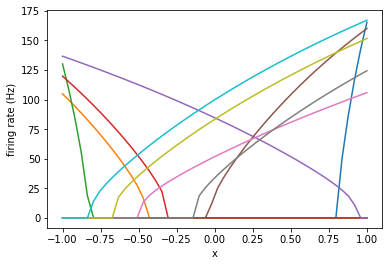

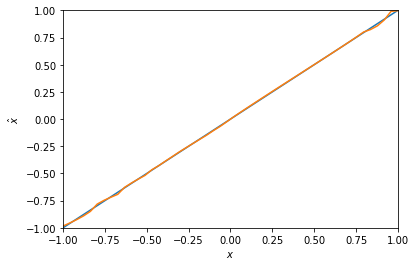

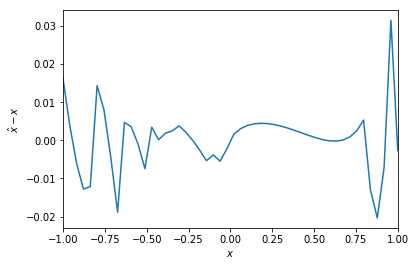

In [11]:
import numpy
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform

N = 10

model = nengo.Network(label='Neurons')
with model:
    neurons = nengo.Ensemble(N, dimensions=1, 
                             max_rates=Uniform(100,200)) #Defaults to LIF neurons, 
                                        #with random gains and biases for
                                        #neurons between 100-200hz over -1,1

    connection = nengo.Connection(neurons, neurons, #This is just to generate the decoders
                                  solver=nengo.solvers.LstsqL2(reg=0)) #reg=0 means ignore noise
    
sim = nengo.Simulator(model)

d = sim.data[connection].weights.T

x, A = tuning_curves(neurons, sim)

xhat = numpy.dot(A, d)

pyplot.plot(x, A)
xlabel('x')
ylabel('firing rate (Hz)')

figure()
plot(x, x)
plot(x, xhat)
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, xhat-x)
xlabel('$x$')
ylabel('$\hat{x}-x$')
xlim(-1, 1)

print('RMSE', np.sqrt(np.average((x-xhat)**2)))

- What happens to the error with more or fewer neurons?

## Noise

- Neurons aren't perfect
    - Axonal jitter
    - Neurotransmitter vesicle release failure (~80%)
    - Amount of neurotransmitter per vesicle
    - Thermal noise
    - Ion channel noise (# of channels open and closed)
    - Network effects
    - More information: http://icwww.epfl.ch/~gerstner/SPNM/node33.html
- How do we include this noise as well?
    - Make the neuron model more complicated
    - Simple approach: add gaussian random noise to $a_i$
        - Set noise standard deviation $\sigma$ to 20% of maximum firing rate
        - Each $a_i$ value for each $x$ value gets a different noise value added to it
- What effect does this have on decoding?        

RMSE 0.2297738281779925


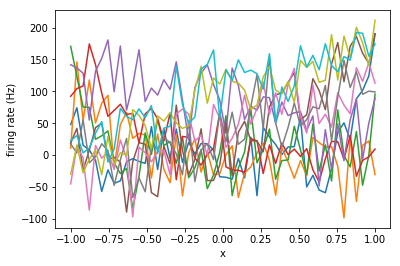

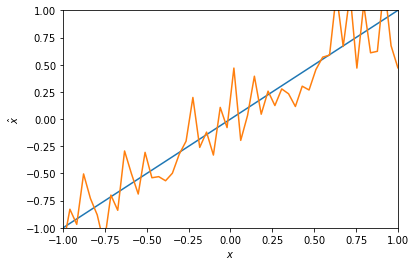

In [12]:
#Have to run previous python cell first
A_noisy = A + numpy.random.normal(scale=0.2*numpy.max(A), size=A.shape)

xhat = numpy.dot(A_noisy, d)

pyplot.plot(x, A_noisy)
xlabel('x')
ylabel('firing rate (Hz)')

figure()
plot(x, x)
plot(x, xhat)
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

print('RMSE', np.sqrt(np.average((x-xhat)**2)))

- What if we just increase the number of neurons?  Will it help?

## Taking noise into account

- Include noise while solving for decoders

    - Introduce noise term $\eta$

$ 
\begin{align}
\hat{x} &= \sum_i(a_i+\eta)d_i \\
E &= {1 \over 2} \int_{-1}^1 (x-\hat{x})^2 \;dx d\eta\\
 &= {1 \over 2} \int_{-1}^1 \left(x-\sum_i(a_i+\eta)d_i\right)^2 \;dx d\eta\\
 &= {1 \over 2} \int_{-1}^1 \left(x-\sum_i a_i d_i - \sum \eta d_i \right)^2 \;dx d\eta
\end{align}
$
- Assume noise is gaussian, independent, mean zero, and has the same variance for each neuron
    - $\eta = \mathcal{N}(0, \sigma)$
    - All the noise cross-terms disappear (independent)

$ 
\begin{align}
E &= {1 \over 2} \int_{-1}^1 \left(x-\sum_i a_i d_i \right)^2 \;dx + \sum_{i,j} d_i d_j <\eta_i \eta_j>_\eta  \\
 &= {1 \over 2} \int_{-1}^1 \left(x-\sum_i a_i d_i \right)^2 \;dx + \sum_{i} d_i d_i <\eta_i \eta_i>_\eta  
\end{align}
$

- Since the average of $\eta_i \eta_i$ noise is its variance (since the mean is zero), $\sigma^2$, we get
 
$ 
\begin{align}
E = {1 \over 2} \int_{-1}^1 \left(x-\sum_i a_i d_i \right)^2 \;dx + \sigma^2 \sum_i d_i^2 
\end{align}
$

- The practical result is that, when computing the decoder, we get

$ 
\begin{align}
\Gamma_{ij} = \sum_x a_i a_j / S + \sigma^2 \delta_{ij}
\end{align}
$


- Where $\delta_{ij}$ is the Kronecker delta: http://en.wikipedia.org/wiki/Kronecker_delta
    
- To simplfy computing this using matrices, this can be written as $\Gamma=A^T A /S + \sigma^2 I$



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE 0.19855054030200037


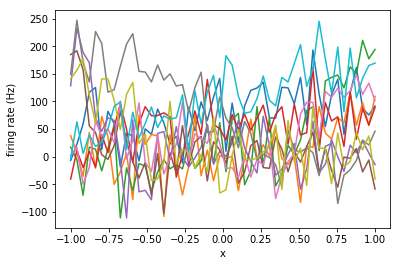

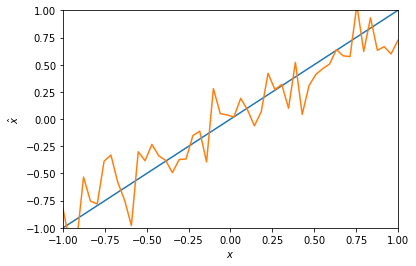

In [16]:
import numpy
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform

N = 10

model = nengo.Network(label='Neurons')
with model:
    neurons = nengo.Ensemble(N, dimensions=1, 
                             max_rates=Uniform(100,200)) #Defaults to LIF neurons, 
                                        #with random gains and biases for
                                        #neurons between 100-200hz over -1,1

    connection = nengo.Connection(neurons, neurons, #This is just to generate the decoders
                                  solver=nengo.solvers.LstsqNoise(noise=0.2)) #Add noise ###NEW
    
sim = nengo.Simulator(model)

d = sim.data[connection].weights.T

x, A = tuning_curves(neurons, sim)

A_noisy = A + numpy.random.normal(scale=0.2*numpy.max(A), size=A.shape)

xhat = numpy.dot(A_noisy, d)

pyplot.plot(x, A_noisy)
xlabel('x')
ylabel('firing rate (Hz)')

figure()
plot(x, x)
plot(x, xhat)
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

print('RMSE', np.sqrt(np.average((x-xhat)**2)))

## Number of neurons

- What happens to the error with more neurons?
    - Note that the error has two parts:
    
$ 
\begin{align}
E = {1 \over 2} \int_{-1}^1 \left(x-\sum_i a_i d_i \right)^2 \;dx + \sigma^2 \sum_i d_i^2 
\end{align}
$    

- Error due to static distortion (i.e. the error introduced by the decoders themselves)
    - This is present regardless of noise
    
$ 
\begin{align}
E_{distortion} = {1 \over 2} \int_{-1}^1 \left(x-\sum_i a_i d_i \right)^2 dx 
\end{align}
$    


- Error due to noise
    
$
\begin{align}
E_{noise} = \sigma^2 \sum_i d_i^2 
\end{align}
$    
    
- What do these look like as number of neurons $N$ increases?    

<img src="files/lecture2/repn_noise.png" width="800">
- Noise error is proportional to $1/N$
- Distortion error is proportional to $1/N^2$
- Remember this error $E$ is defined as

$ E = {1 \over 2} \int_{-1}^1 (x-\hat{x})^2 dx $

- So that's actually a squared error term

- Also, as number of neurons is greater than 100 or so, the error is dominated by the noise term ($1/N$).

# Examples

- Methodology for building models with the Neural Engineering Framework (outlined in Chapter 1)
    1. System Description: Describe the system of interest in terms of the neural data, architecture, computations, representations, etc. (e.g. response functions, tuning curves, etc.)
    2. Design Specification: Add additional performance constraints (e.g. bandwidth, noise, SNR, dynamic range, stability, etc.)
    3. Implement the model: Employ the NEF principles given the System Description and Design Specification

## Example 1: Horizontal Eye Control (1D)

From http://www.nature.com/nrn/journal/v3/n12/full/nrn986.html

<img src="files/lecture2/horizontal_eye.jpg">

There are also neurons whose response goes the other way.  All of the neurons are directly connected to the muscle controlling the horizontal direction of the eye, and that's the only thing that muscle does, so we're pretty sure this is what's being repreesnted.

- System Description

    - We've only done the first NEF principle, so that's all we'll worry about
    - What is being represented?
    - $x$ is the horizontal position
    - Tuning curves: extremely linear (high $\tau_{RC}$, low $\tau_{ref}$)
        - some have $e=1$, some have $e=-1$
        - these are often called "on" and "off" neurons, respectively
    - Firing rates of up to 300Hz
    
- Design Specification
    - Range of values for $x$:  -60 degrees to +60 degrees
    - Normal levels of noise: $\sigma$ is 20% of maximum firing rate
        - the book goes a bit higher, with $\sigma^2=0.1$, meaning that $\sigma = \sqrt{0.1} \approx 0.32$ times the maximum firing rate

- Implementation
    - Examine the tuning curves
    - Then use principle 1

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

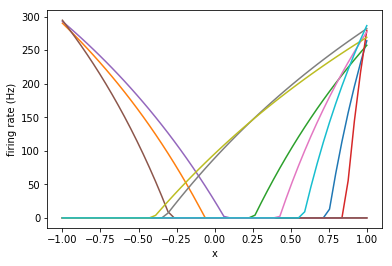

In [17]:
#%pylab inline
import numpy
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform

N = 10
tau_rc = 20
tau_ref = .001
lif_model = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)

model = nengo.Network(label='Neurons')
with model:
    neurons = nengo.Ensemble(N, dimensions=1, 
                             max_rates = Uniform(250,300),
                             neuron_type = lif_model)
sim = nengo.Simulator(model)

x, A = tuning_curves(neurons, sim)

plot(x, A)
xlabel('x')
ylabel('firing rate (Hz)');

- How good is the representation?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with 10 neurons is 0.128518


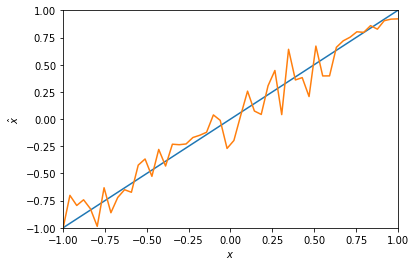

In [18]:
#Have to run previous code cell first
noise = 0.2

with model:
    connection = nengo.Connection(neurons, neurons, #This is just to generate the decoders
                                  solver=nengo.solvers.LstsqNoise(noise=0.2)) #Add noise ###NEW
    
sim = nengo.Simulator(model)

d = sim.data[connection].weights.T
x, A = tuning_curves(neurons, sim)
A_noisy = A + numpy.random.normal(scale=noise*numpy.max(A), size=A.shape)
xhat = numpy.dot(A_noisy, d)

print('RMSE with %d neurons is %g'%(N, np.sqrt(np.average((x-xhat)**2))))

figure()
plot(x, x)
plot(x, xhat)
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1);

- Possible questions
    - How many neurons do we need for a particular level of accuracy?
    - What happens with different firing rates?
    - What happens with different distributions of x-intercepts?

## Example 2: Arm Movements (2D)

- [Georgopoulos et al., 1982.  "On the relations between the direction of two-dimensional arm movements and cell discharge in primate motor cortex."](http://www.ncbi.nlm.nih.gov/pubmed/7143039)

<img src="files/lecture2/armmovement1.jpg">

<img src="files/lecture2/armmovement2.png">

<img src="files/lecture2/armtuningcurve.png">




- System Description

    - What is being represented?
    - $x$ is the hand position
    - Note that this is *different* from what Georgopoulos talks about in this initial paper
        - Initial paper only looks at those 8 positions, so it only talks about direction of movement (angle but not magnitude)
        - More recent work in the same area shows the cells do respond to both (Fu et al, 1993; Messier and Kalaska, 2000)
    - Bell-shaped tuning curves
    - Encoders: randomly distributed around the unit circle
    - Firing rates of up to 60Hz
        
- Design Specification
    - Range of values for $x$:  Anywhere within a unit circle (or perhaps some other radius)
    - Normal levels of noise: $\sigma$ is 20% of maximum firing rate
        - the book goes a bit higher, with $\sigma^2=0.1$, meaning that $\sigma = \sqrt{0.1} \approx 0.32$ times the maximum 
- Implementation
    - Examine the tuning curves

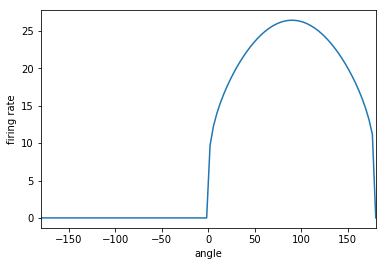

In [19]:
import numpy
import nengo

n = nengo.neurons.LIFRate() 

theta = numpy.linspace(-numpy.pi, numpy.pi, 100)
x = numpy.array([numpy.sin(theta), numpy.cos(theta)])

e = numpy.array([1.0, 0]) 

plot(theta*180/numpy.pi, n.rates(numpy.dot(x.T, e), bias=1, gain=0.2)) #bias 1->1.5
xlabel('angle')
ylabel('firing rate')
xlim(-180, 180)
show()

- Does it match empirical data?
    - When tuning curves are plotted just considering $\theta$, they are fit by $a_i=b_0+b_1cos(\theta-\theta_e)$    
    - Where $\theta_e$ is the angle for the encoder $e_i$ and $b_0$ and $b_1$ are constants
    
- Interestingly, Georgopoulos suggests doing linear decoding:
    - $\hat{x}=\sum_i a_i e_i$
    - This gives a somewhat decent estimate of the direction of movement (but a terrible estimate of magnitude)
    

## Higher-dimensional Tuning
- Note that there can be different ways of organizing the representation of a higher dimensional space

<img src="files/lecture2/semicircular_canal.png">

- Here, the neurons respond to angular velocity.  This is a 3D vector.  
- But, instead of randomly distributing encoders around the 3D space, they are aligned with a major axis
    - encoders are chosen from [1,0,0], [-1,0,0], [0,1,0], [0,-1,0], [0,0,1], [0,0,-1]
- This can affect on the representation

<img src="files/lecture2/aligned_encoders.png">

# Administrative Notes

- Assignment 1 has been posted 
    - [HTML](http://nbviewer.ipython.org/github/celiasmith/syde556/blob/master/Assignment%201.ipynb)
- Due:  January 28th at midnight
- Total marks: 20 (20% of final grade)
- Late penalty: 1 mark per day
- It is recommended that you use Python.
